In [1]:
import pertpy as pt
import scanpy as sc
from pathlib import Path

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# colname	type (unit)	description
# s	float (seconds)	Running time in seconds
# h:m:s	string (-)	Running time in hour, minutes, seconds format
# max_rss	float (MB)	Maximum "Resident Set Size”, this is the non-swapped physical memory a process has used.
# max_vms	float (MB)	Maximum “Virtual Memory Size”, this is the total amount of virtual memory used by the process
# max_uss	float (MB)	“Unique Set Size”, this is the memory which is unique to a process and which would be freed if the process was terminated right now.
# max_pss	float (MB)	“Proportional Set Size”, is the amount of memory shared with other processes, accounted in a way that the amount is divided evenly between the processes that share it (Linux only)
# io_in	float (MB)	the number of MB read (cumulative).
# io_out	float (MB)	the number of MB written (cumulative).
# mean_load	float (-)	CPU usage over time, divided by the total running time (first row)
# cpu_time	float(-)	CPU time summed for user and system

# Augur Runtime

In [4]:
dats = {}
for file in Path('snakemake/benchmarks/').rglob('augur.*.pertpy.*'):
    data = pd.read_csv(file, sep='\t')
    n_obs = int(file.stem.split('.')[1])
    if n_obs != 0:
        dats[n_obs] = data

In [16]:
df = pd.concat(dats)
df.index = df.index.droplevel(1)
df.sort_index(inplace=True)
df.index.name = 'n_obs'

In [17]:
df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
n_obs,,,,,,,,,,
1000,130.6740,0:02:10,4015.00,17109.19,2890.64,3268.92,686.13,0.01,83.10,112.44
5000,153.5305,0:02:33,4159.93,17263.33,2978.64,3067.91,22.53,0.01,81.27,131.06
10000,152.8932,0:02:32,4216.19,17335.56,3042.68,3135.50,2.06,0.01,82.34,132.10
50000,158.5713,0:02:38,4571.41,17696.66,3295.51,3435.80,1.13,0.01,79.26,131.88
100000,164.4164,0:02:44,5071.61,18133.16,3669.67,3879.35,2.35,0.01,76.19,131.35
500000,217.6984,0:03:37,10364.98,23537.53,8160.09,8947.96,142.47,0.01,137.78,315.56
1000000,297.6124,0:04:57,16796.64,29938.48,13310.28,14862.88,247.52,0.01,161.08,491.95


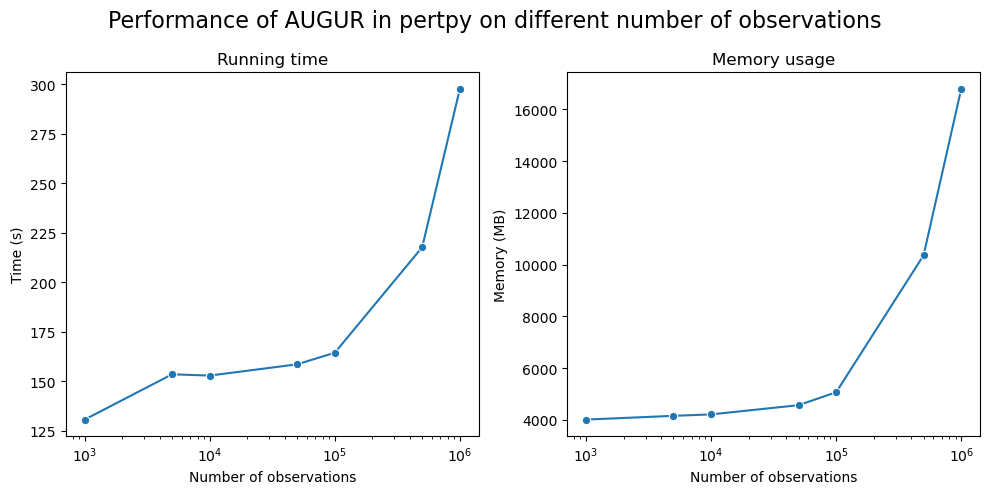

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = axs[0]
sns.lineplot(data=df, x='n_obs', y='s', ax=ax, marker='o')
ax.set_xlabel('Number of observations')
ax.set_ylabel('Time (s)')
ax.set_title('Running time')
ax.set_xscale('log')

ax = axs[1]
sns.lineplot(data=df, x='n_obs', y='max_rss', ax=ax, marker='o')
ax.set_xlabel('Number of observations')
ax.set_ylabel('Memory (MB)')
ax.set_title('Memory usage')
ax.set_xscale('log')
plt.suptitle('Performance of AUGUR in pertpy on different number of observations', fontsize=16)
plt.tight_layout()
plt.show()